In [1]:
import pandas as pd
import seaborn as sns
from table_reader import TableReader
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

Hey folks, I'm just trying out a proof-of-concept jupyter notebook that uses our data retrieval code.

I got sick of working with environment variables so I switched to a new method to store our DB password:
    1. Create a file called config.json in the project root.
    2. Inside, config.json should look like this:
    {
        "database_url":"database_url_goes_here"
    }

TableReader's other vector methods are geodata_vector() and reviews_vector(). Be sure to call close() when you're done so it terminates the connection to the DB.

In [2]:
tr = TableReader()
df = tr.properties_vector(include_amenitites=True)
rf = tr.reviews_vector()
print(rf.head())
tr.close()

   listingID  num_reviews     rating   accuracy  cleanliness    checkin  \
0       3344           11  100.00000  10.000000    10.000000  10.000000   
1       3362          160   96.00000   9.000000     9.000000  10.000000   
2       3662           36   94.00000  10.000000     9.000000  10.000000   
3       3686           69   91.00000   9.000000     9.000000  10.000000   
4       3771            1   94.57338   9.684475     9.516239   9.793778   

   communication   location     value  
0      10.000000  10.000000  10.00000  
1      10.000000  10.000000  10.00000  
2      10.000000   8.000000   9.00000  
3      10.000000   7.000000   9.00000  
4       9.772863   9.618172   9.50508  


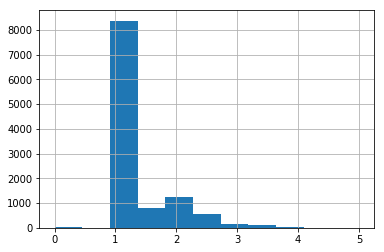

In [3]:
df['bathrooms'].hist(bins=11)

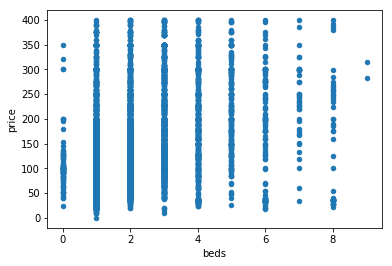

In [4]:
df.plot(x='beds', y='price', kind='scatter')
plt.show()

In [5]:
df['price'].mean()

127.482801528753

In [6]:
maxVal = 15
df['beds'] = df['beds'].where(df['beds'] <= maxVal, maxVal) 

maxVal = 10
df['bathrooms'] = df['bathrooms'].where(df['bathrooms'] <= maxVal, maxVal)

maxVal = 2000
df['price'] = df['price'].where(df['price'] <= maxVal, maxVal) 

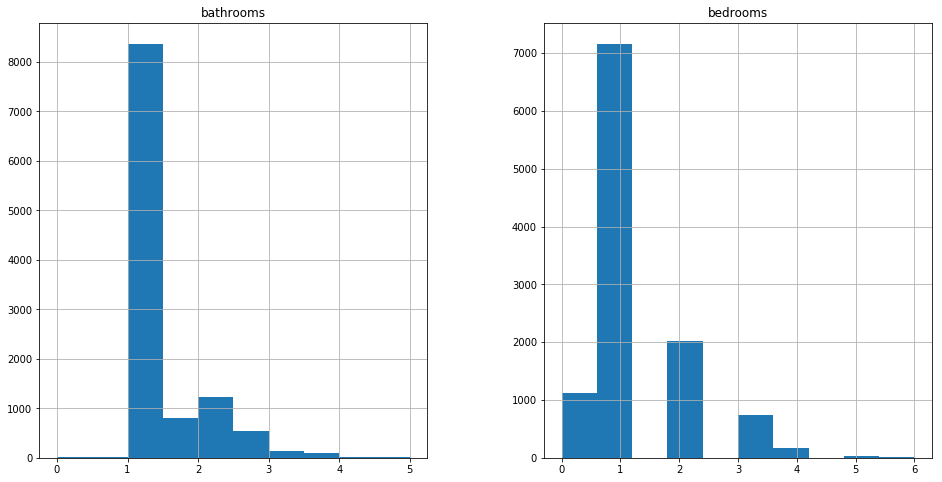

In [7]:
df.hist(column=['bathrooms', 'bedrooms'],bins=10, figsize=(16,8))
plt.savefig('bedrooms_bathrooms_hist.png', dpi=100)
plt.show()

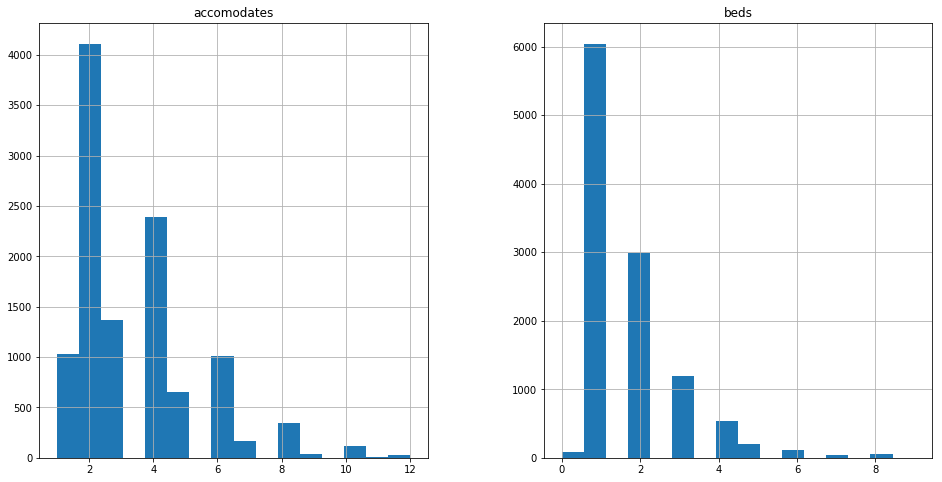

In [8]:
df.hist(column=['accomodates', 'beds'],bins=16, figsize=(16,8))
plt.savefig('accomodates_beds_hist.png', dpi=100)
plt.show()

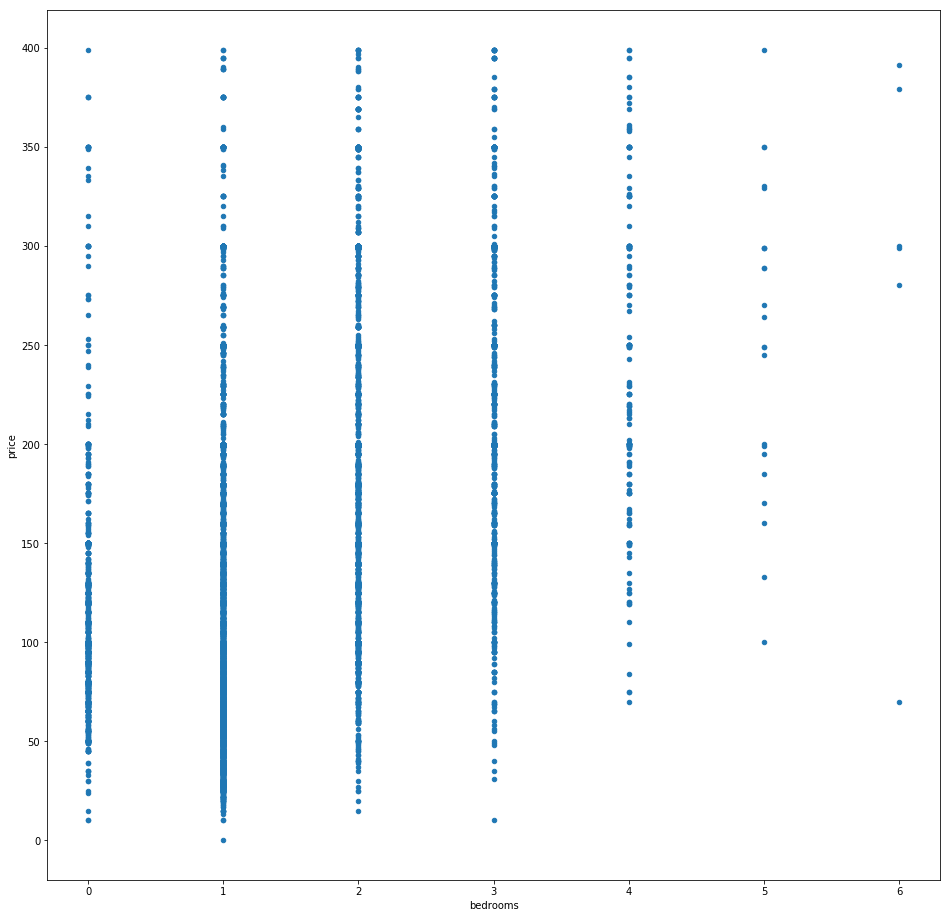

In [9]:

df.plot(x='bedrooms', y='price', kind='scatter', figsize=(16,16))
plt.savefig('bedrooms_scatter.png', dpi=100)
plt.show()

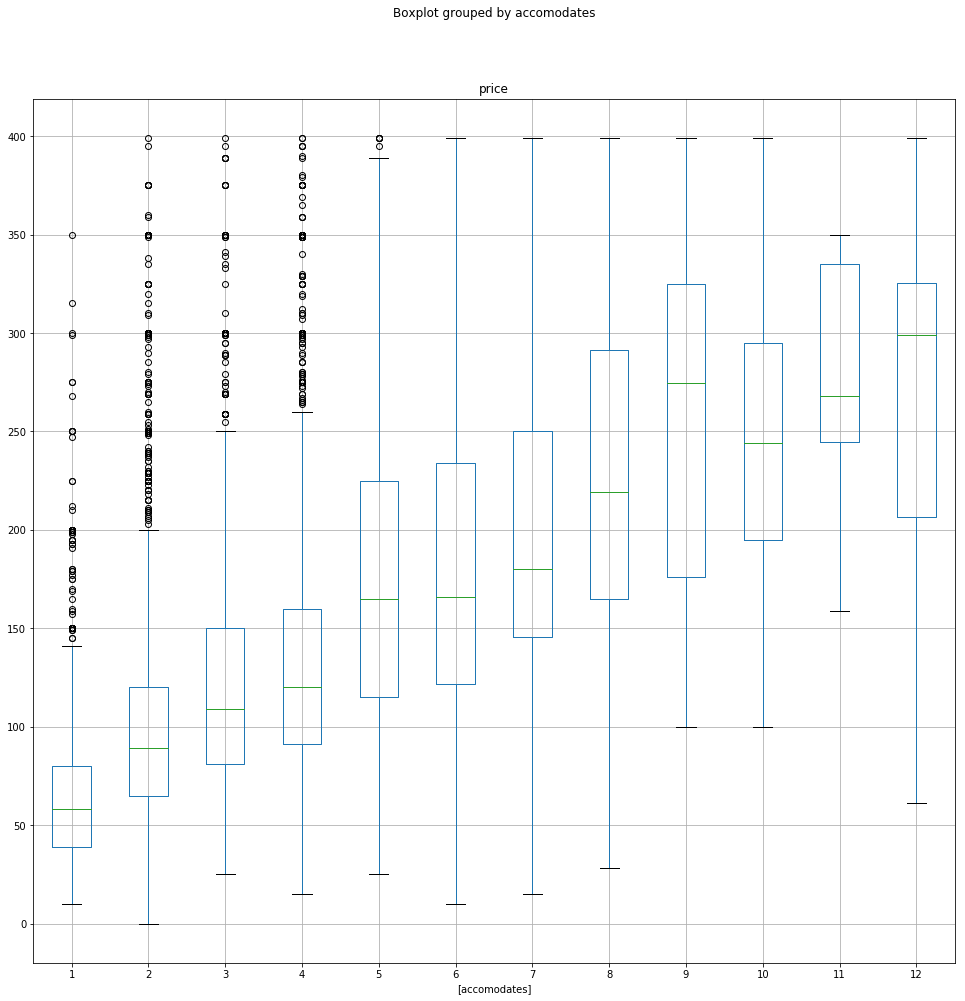

In [10]:
boxplot = df[['accomodates','price']].boxplot(by='accomodates', figsize=(16,16))
plt.savefig('accomodates_box.png', dpi=100)

In [11]:
rf.describe()

,listingID,num_reviews,rating,accuracy,cleanliness,checkin,communication,location,value
count,1.251700e+04,12517.000000,12517.000000,12517.000000,12517.000000,12517.000000,12517.000000,12517.000000,12517.000000
mean,1.847313e+07,30.878565,95.218902,9.684475,9.516239,9.793778,9.772863,9.618172,9.505080
std,9.250700e+06,55.595312,4.115232,0.665022,0.776756,0.575909,0.605920,0.634833,0.726034
min,3.344000e+03,0.000000,85.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.221666e+07,1.000000,94.573380,9.684475,9.516239,9.793778,9.772863,9.618172,9.000000
50%,1.822645e+07,7.000000,95.000000,10.000000,9.516239,10.000000,10.000000,10.000000,9.505080
75%,2.597210e+07,35.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.488810e+07,728.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


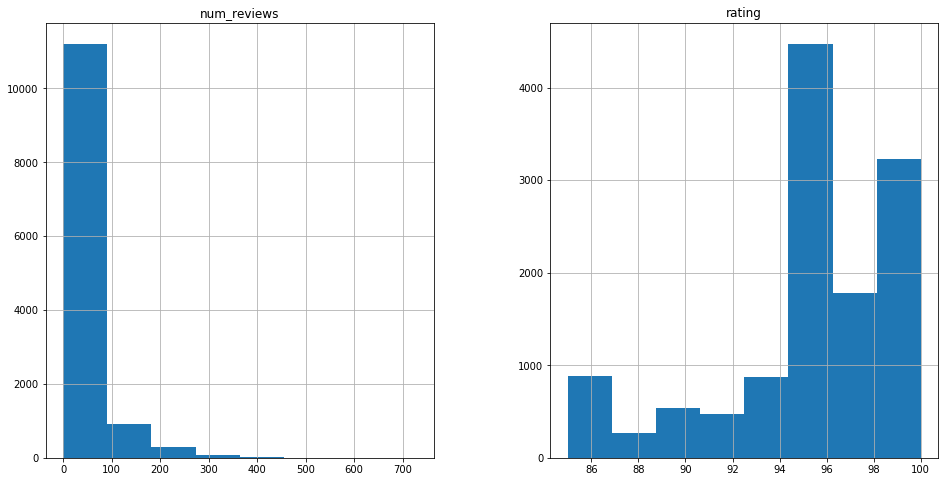

In [12]:
rf.hist(column=['num_reviews', 'rating'], bins=8, figsize=(16,8))
plt.savefig('numreviews_rating_hist.png', dpi=100)
plt.show()

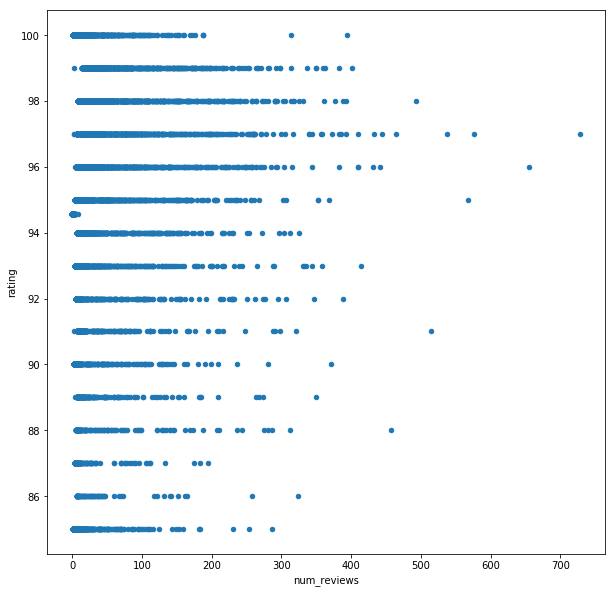

In [13]:
rf.plot(x='num_reviews', y='rating', kind='scatter', figsize=(10,10))
plt.savefig('numreviews_rating_scatter.png', dpi=100)
plt.show()

In [14]:
am_df = df[['price', 'Fire extinguisher', 'Hair dryer',
       'Extra pillows and blankets', 'Host greets you', 'Dog(s)', 'Washer',
       'Keypad', 'Essentials', 'Pets allowed', 'Dryer', 'Microwave', 'Pool',
       'Free street parking', 'Wifi', 'Iron',
       'translation missing: en.hosting_amenity_49', '24-hour check-in',
       'Smoking allowed', 'TV', 'Smoke detector', 'Self check-in',
       'Free parking on premises', 'Kitchen', 'Lock on bedroom door',
       'Wheelchair accessible', 'Dishwasher', 'Air conditioning', 'Bed linens',
       'Coffee maker', 'Hangers', 'Refrigerator', 'Shampoo',
       'Private entrance', 'Other', 'Safety card', 'Cat(s)',
       'Buzzer/wireless intercom', 'Oven', 'Gym', 'Smart lock',
       'Laptop friendly workspace', 'Carbon monoxide detector', 'Elevator',
       'Pets live on this property', 'Indoor fireplace', 'Doorman', 'Cable TV',
       'translation missing: en.hosting_amenity_50', 'First aid kit',
       'Heating', 'Family/kid friendly', 'Hot water', 'Breakfast',
       'Paid parking off premises', 'Lockbox', 'Internet', 'Bathtub',
       'Hot tub', 'Suitable for events', 'Private living room',
       'Dishes and silverware']]

In [15]:
am_df.describe()

,price,Fire extinguisher,Hair dryer,Extra pillows and blankets,Host greets you,Dog(s),Washer,Keypad,Essentials,Pets allowed,...,Hot water,Breakfast,Paid parking off premises,Lockbox,Internet,Bathtub,Hot tub,Suitable for events,Private living room,Dishes and silverware
count,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,...,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.00000,11251.000000,11251.000000
mean,127.482802,0.616301,0.578971,0.009333,0.015465,0.040441,0.823038,0.038308,0.918674,0.168163,...,0.124078,0.117323,0.092436,0.073771,0.338192,0.021154,0.030397,0.04524,0.042663,0.009155
std,75.388296,0.486308,0.493746,0.096157,0.123400,0.197000,0.381654,0.191947,0.273347,0.374027,...,0.329685,0.321819,0.289654,0.261410,0.473115,0.143903,0.171686,0.20784,0.202105,0.095246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,103.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,159.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,399.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
maxVal = 750
am_df['price'] = am_df['price'].where(am_df['price'] <= maxVal, maxVal) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


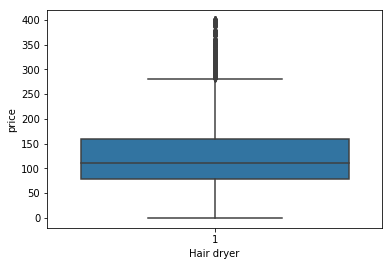

In [17]:
ax = sns.boxplot(x="Hair dryer", y="price", data=am_df, order=[1])

In [18]:
for col in am_df.columns:
    if col != 'price':
        am_df[col] = am_df[col] * am_df['price']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
am_df = am_df.replace({0:np.nan})
am_df.head()

,price,Fire extinguisher,Hair dryer,Extra pillows and blankets,Host greets you,Dog(s),Washer,Keypad,Essentials,Pets allowed,...,Hot water,Breakfast,Paid parking off premises,Lockbox,Internet,Bathtub,Hot tub,Suitable for events,Private living room,Dishes and silverware
0,48.0,48.0,NaN,NaN,NaN,NaN,48.0,NaN,48.0,NaN,...,NaN,48.0,NaN,NaN,48.0,NaN,NaN,48.0,NaN,NaN
2,65.0,NaN,65.0,NaN,NaN,NaN,65.0,NaN,65.0,NaN,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,65.0,NaN,NaN
3,55.0,NaN,NaN,55.0,NaN,NaN,55.0,NaN,55.0,NaN,...,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN
4,88.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,83.0,83.0,83.0,NaN,NaN,NaN,83.0,NaN,83.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


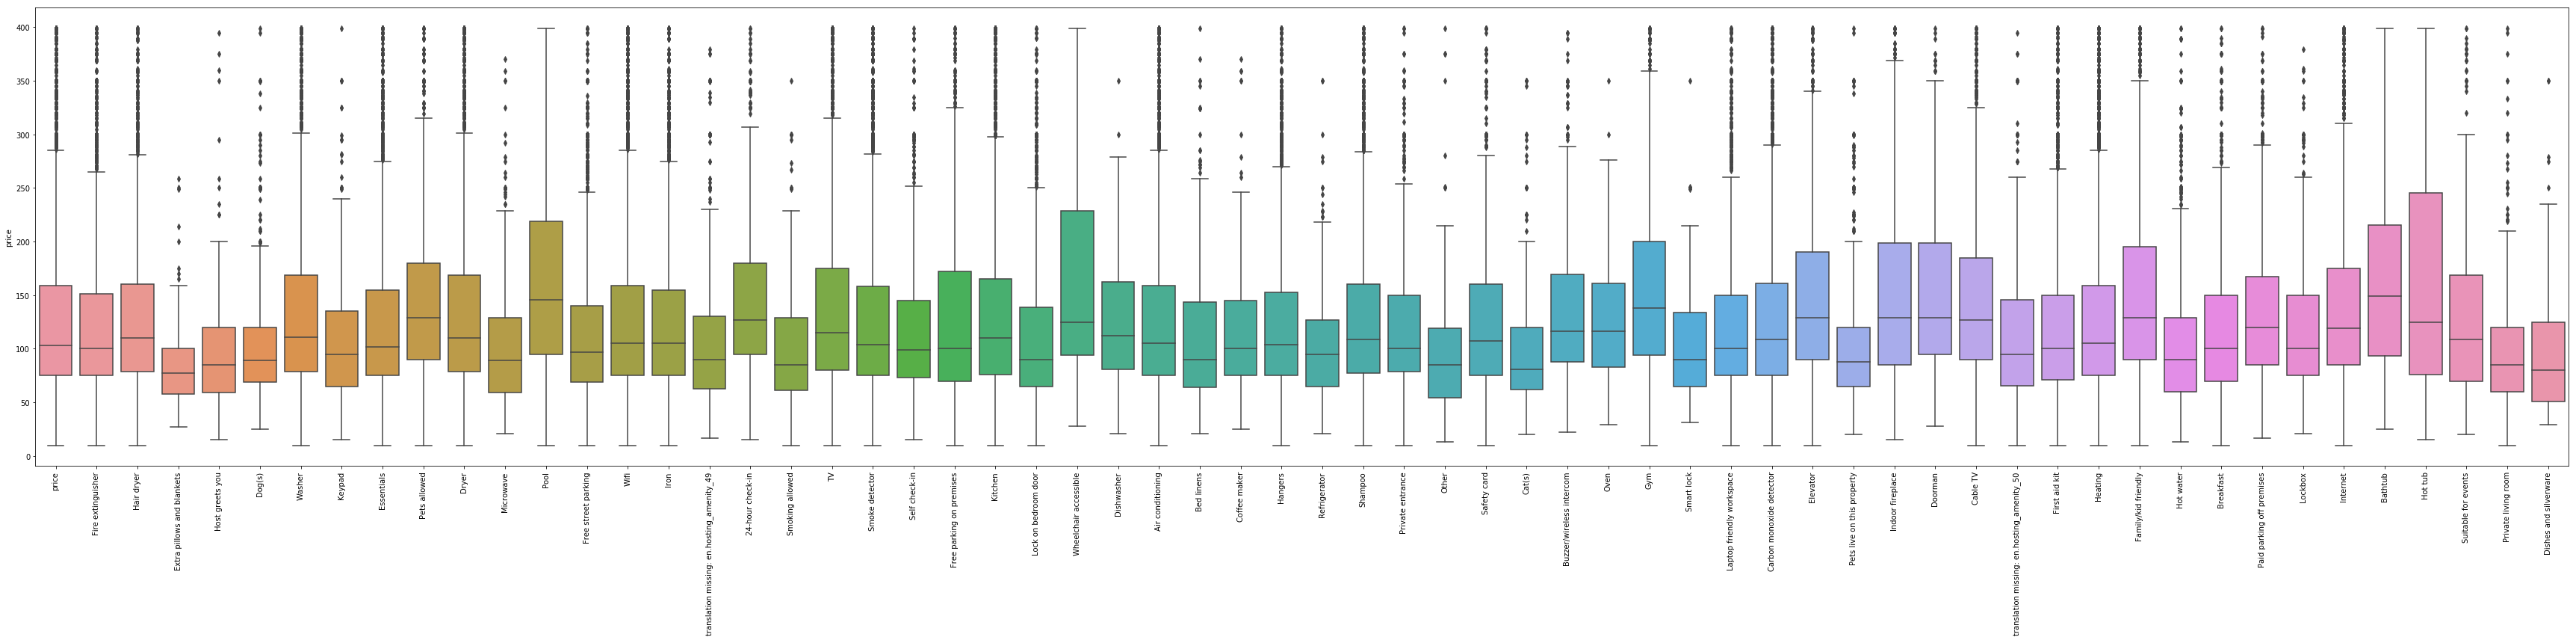

In [20]:
plt.subplots(figsize=(48,12))
am_box = sns.boxplot(data=am_df)
am_box.set_xticklabels(am_box.get_xticklabels(), rotation=90)
plt.ylabel('price')
plt.tight_layout()
plt.savefig('amenities_boxplot.png', dpi=100)

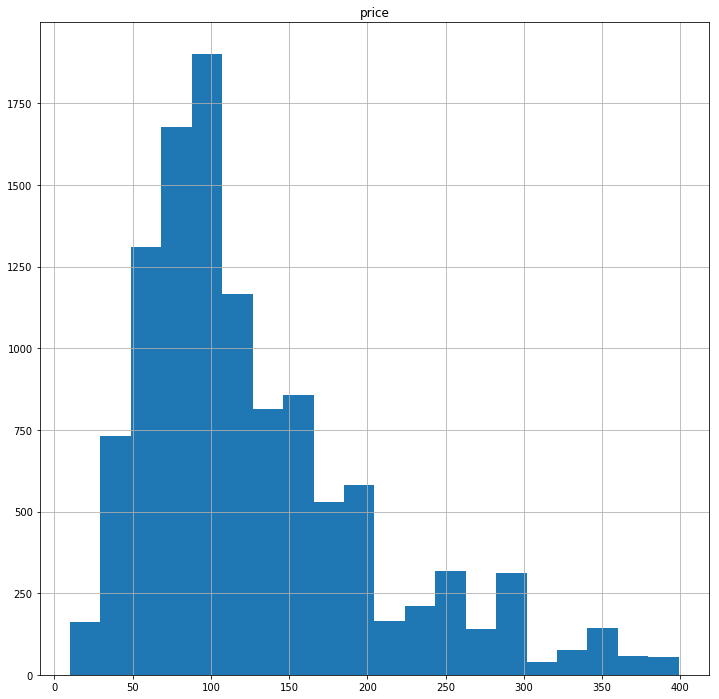

In [21]:
am_df.hist(column=['price'], bins=20, figsize=(12,12))
plt.savefig('price_hist.png', dpi=100)

In [22]:
def standardize(rating):
    mean = rf['rating'].mean()
    std = rf['rating'].std()
    return (rating-mean)/std

rf['standardized_rating'] = rf['rating']
minVal = 85
rf['standardized_rating'] = rf['standardized_rating'].where(rf['standardized_rating'] >= minVal, minVal)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aed35c0>]],
      dtype=object)

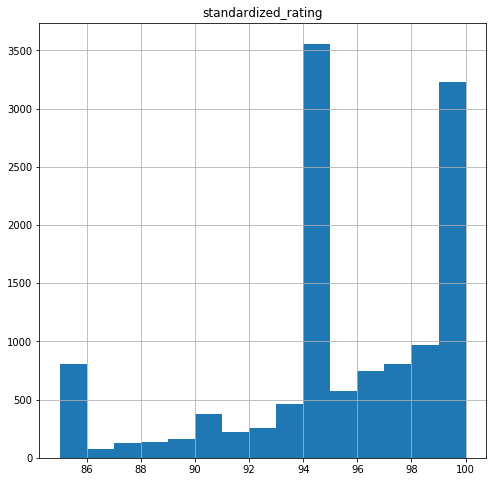

In [23]:
rf.hist(column=['standardized_rating'], bins=15, figsize=(8,8))